In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_edges = pd.read_csv('stack_network_links.csv')
df_nodes = pd.read_csv('stack_network_nodes.csv')

In [2]:
print(df_nodes)
print(df_edges)

           name  group  nodesize
0          html      6    272.45
1           css      6    341.17
2     hibernate      8     29.83
3        spring      8     52.84
4          ruby      3     70.14
..          ...    ...       ...
110        perl     13     19.38
111       cloud      9     10.66
112   photoshop      6     12.62
113  powershell      5      9.85
114      matlab      1     27.21

[115 rows x 3 columns]
               source target      value
0               azure   .net  20.933192
1          sql-server   .net  32.322524
2             asp.net   .net  48.407030
3    entity-framework   .net  24.370903
4                 wpf   .net  32.350925
..                ...    ...        ...
485       objective-c  xcode  43.418825
486             swift  xcode  48.620335
487            iphone  xcode  34.712865
488               ios  xcode  46.365091
489              json    xml  42.721668

[490 rows x 3 columns]


In [3]:
G = nx.Graph(day="Stackoverflow")
G.graph
for index, row in df_nodes.iterrows():
 G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
for index, row in df_edges.iterrows():
 G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

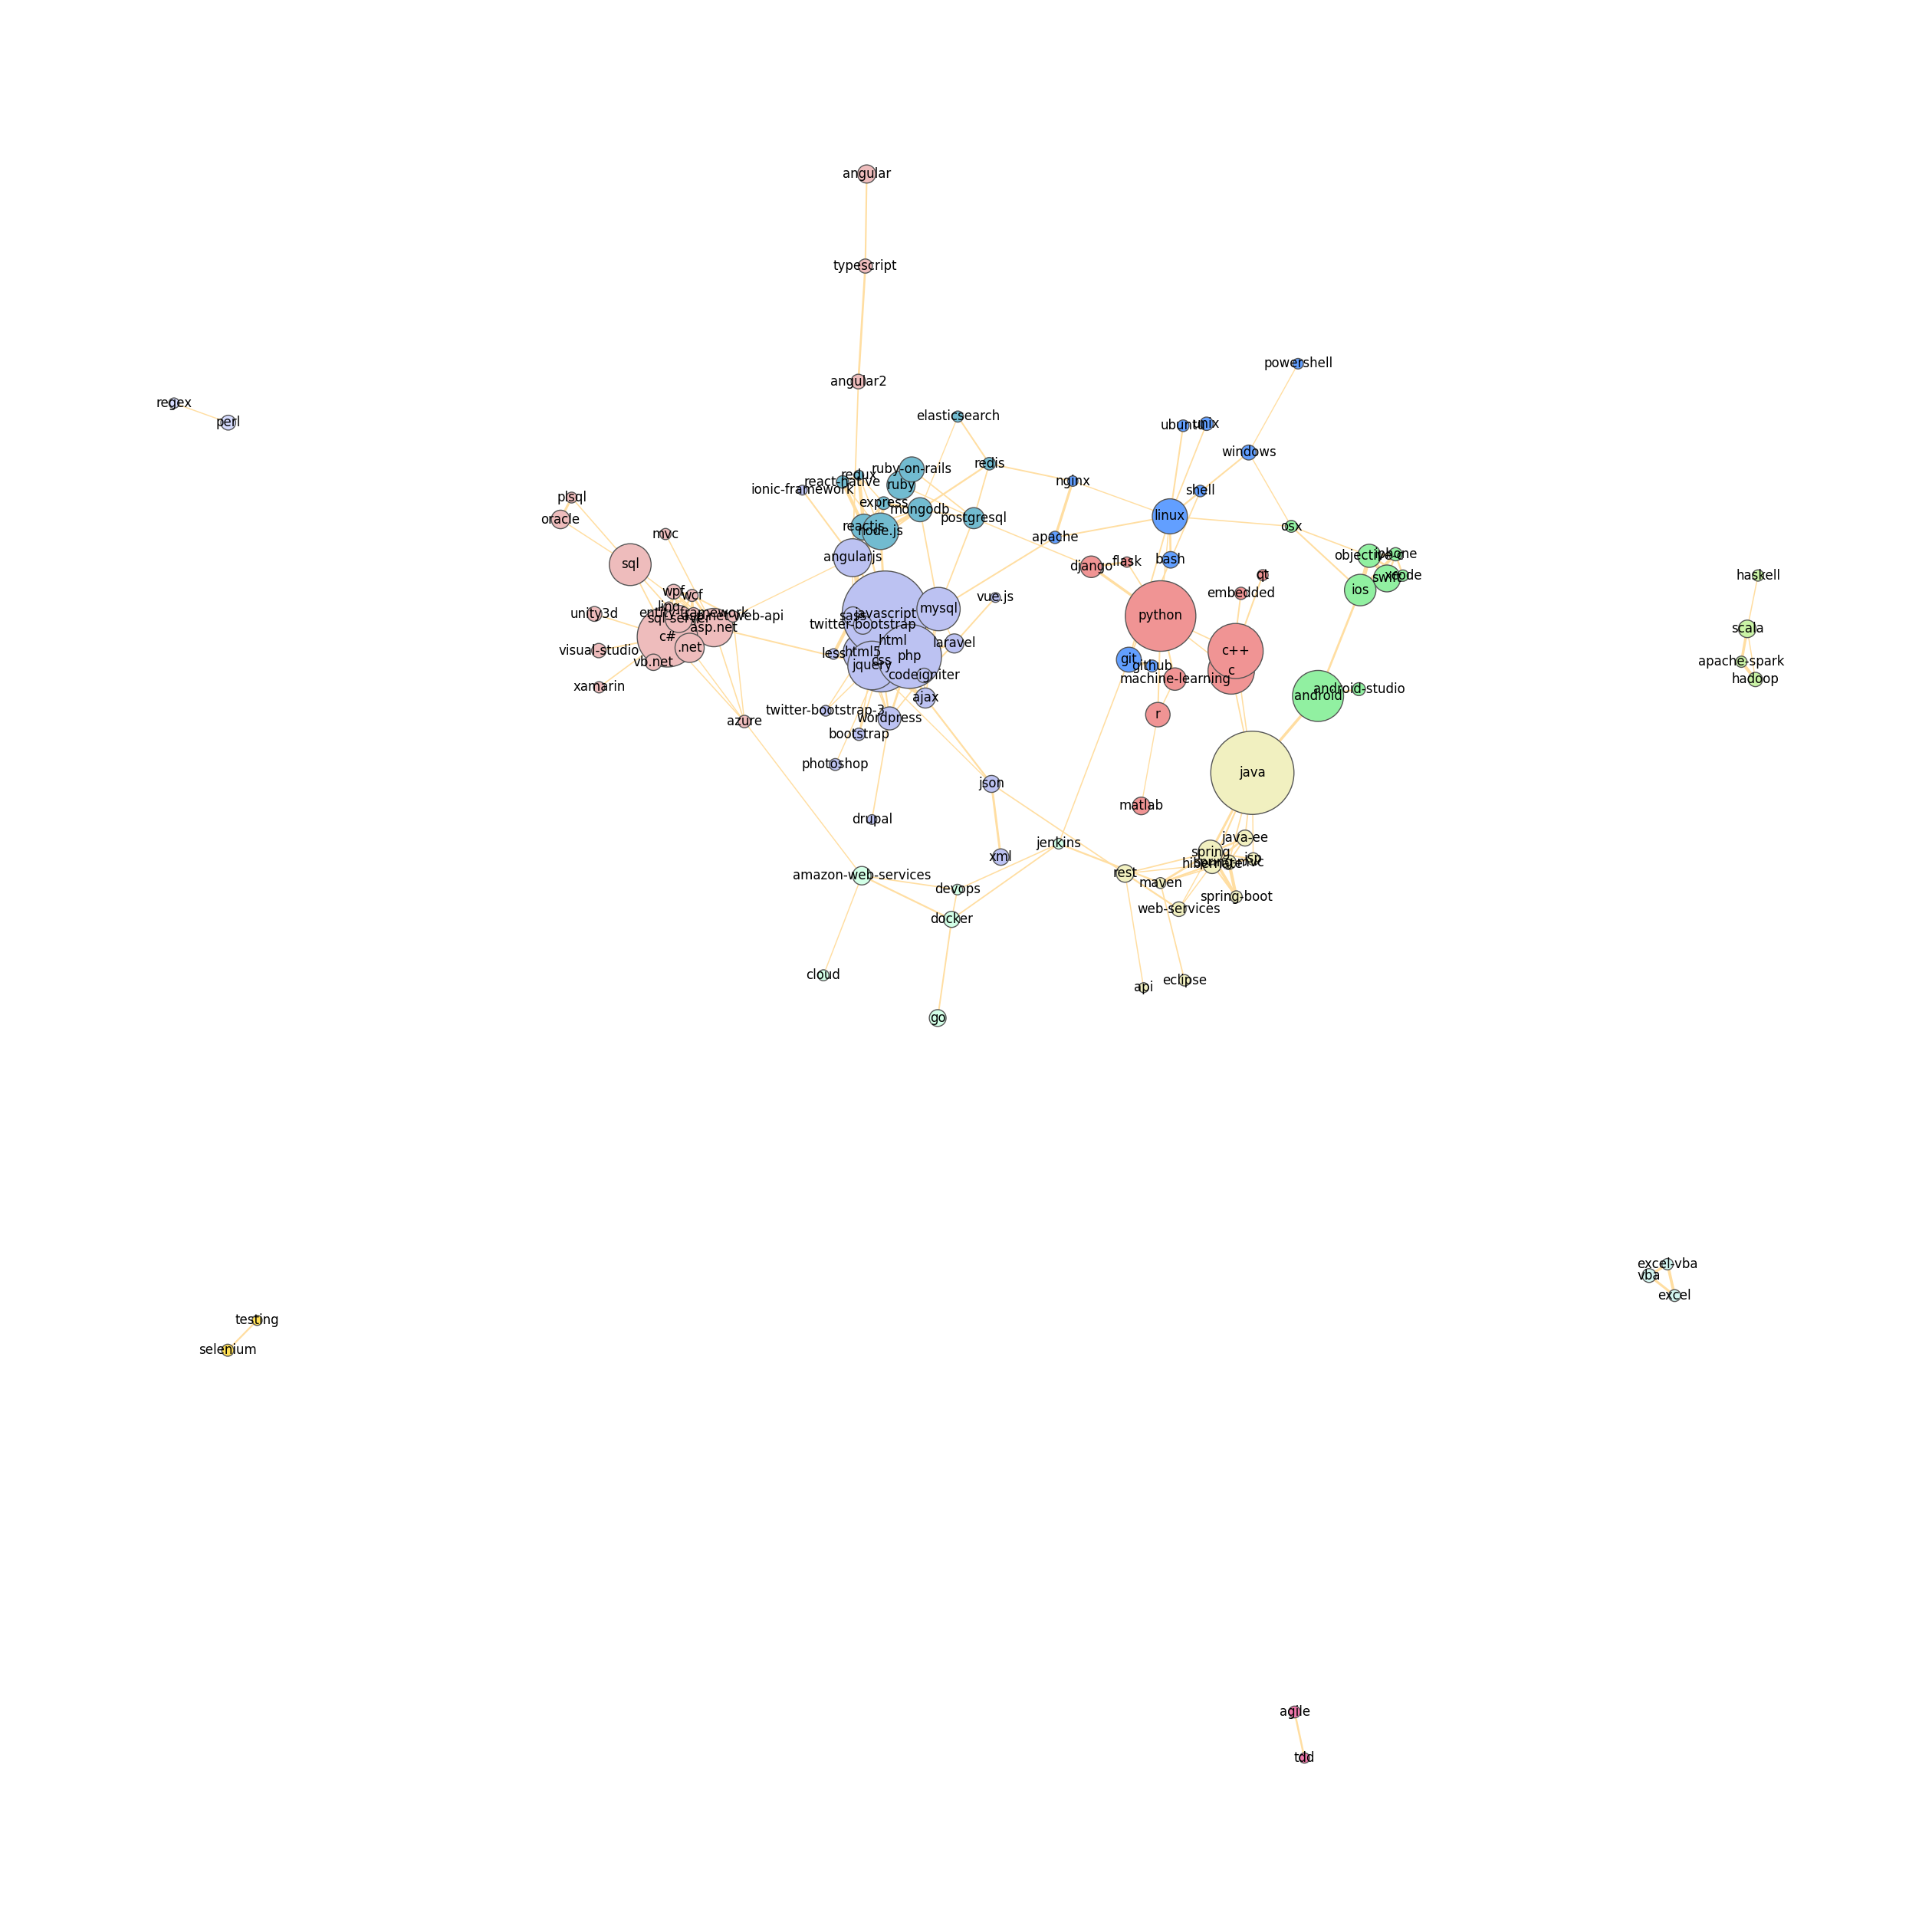

Total graph info: 

Graph with 115 nodes and 245 edges


In [4]:
# Кольори для розмальовування груп:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff',
6:'#bcc2f2', 7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55',
12:'#ef77aa', 13:'#d6dcff', 14:'#d2f5f0'}
colors = [color_map[G.nodes[node]['group']] for node in G]
# Розміри вершин:
sizes = [G.nodes[node]['nodesize']*10 for node in G]
plt.figure(figsize=(25,25))
weights = nx.get_edge_attributes(G,'weight').values()
options = {
 'edge_color': '#FFDEA2',
 'width': [0.05*i for i in weights],
 'with_labels': True,
 'font_weight': 'regular',
}
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25,
iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()
print("Total graph info: \n")
print(G)

In [5]:
# Густина
print("Density: ", nx.density(G))

Density:  0.03737604881769641


In [6]:
# Найкоротші шляхи між вершинами:
print(G.edges(["cloud", "go"]))
print(list(nx.shortest_path_length(G, weight="weight")))

[('cloud', 'amazon-web-services'), ('go', 'docker')]
[('html', {'html': 0, 'mysql': 21.35568889023083, 'sass': 23.639529235488705, 'laravel': 41.58595494452011, 'twitter-bootstrap': 43.82501724639793, 'codeigniter': 43.952574819542434, 'angularjs': 44.06540765215986, 'jquery': 44.23362023021944, 'javascript': 44.27187960675769, 'php': 45.66104087971069, 'ajax': 46.15577831314839, 'postgresql': 47.26563137898761, 'mongodb': 47.72495365186294, 'css': 48.36631137967548, 'reactjs': 48.63748805023231, 'apache': 50.453523437929356, 'html5': 55.70990589158082, 'asp.net-web-api': 64.17850731646212, 'json': 64.86319757107529, 'twitter-bootstrap-3': 65.38686347953218, 'bootstrap': 66.63977487922389, 'elasticsearch': 67.95296050731443, 'express': 68.49923645744057, 'ruby': 69.0608064365891, 'wordpress': 69.08570558529095, 'photoshop': 69.22203280464352, 'django': 69.75488402217007, 'angular2': 70.09810481664913, 'vue.js': 70.38585159948047, 'ruby-on-rails': 72.95574170806034, 'asp.net': 72.956798

In [7]:
# Сортування ребер за їх вагою.
for a, b, data in sorted(G.edges(data=True), key=lambda x: x[2]['weight']):
 print('{a} {b} {w}'.format(a=a, b=b, w=data['weight']))

r matlab 20.021932698311588
angularjs asp.net-web-api 20.11309966430225
spring web-services 20.16560629687762
sass twitter-bootstrap 20.18548801090922
mongodb elasticsearch 20.22800685545149
mysql laravel 20.23026605428928
javascript twitter-bootstrap 20.23882304372428
windows powershell 20.24069060325144
sass angularjs 20.42587841667116
sql-server linq 20.444792111689296
.net linq 20.501743858149062
jquery json 20.62957734085586
css photoshop 20.85572142496804
osx windows 20.860246776482484
html5 less 20.92318766828214
.net azure 20.933192346640457
nginx linux 21.080478447912995
linux shell 21.131792917374074
jquery twitter-bootstrap-3 21.153243249312748
python linux 21.17036044400364
hibernate web-services 21.210956925188103
amazon-web-services azure 21.30994959394633
amazon-web-services cloud 21.31860679884144
html mysql 21.35568889023083
regex perl 21.364077886249937
redux express 21.543458417676824
asp.net-web-api azure 21.585694763313093
java jsp 21.619803035260286
hadoop scala 2

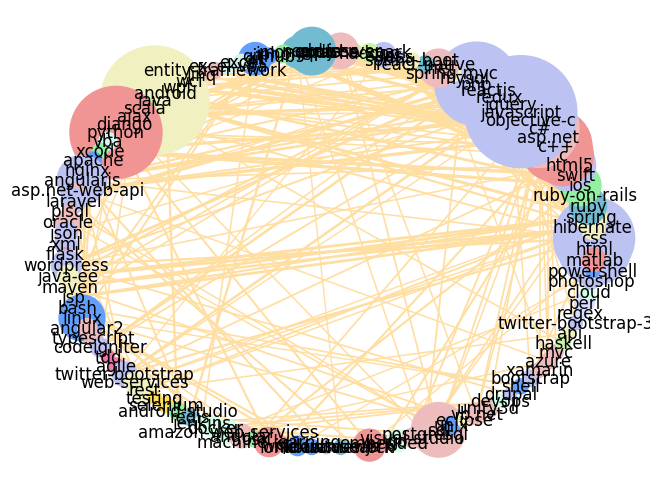

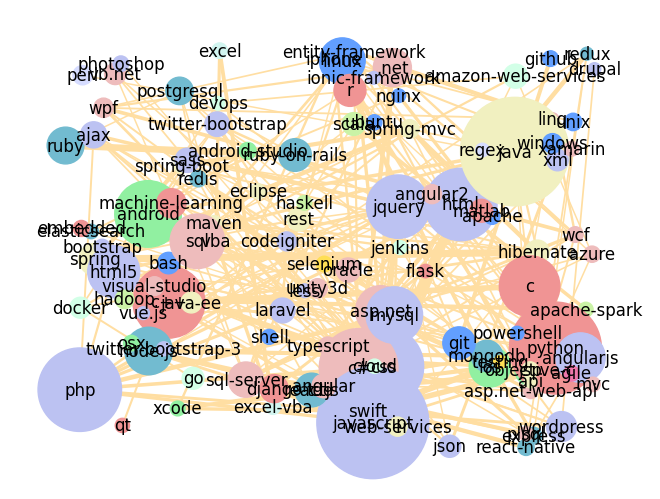

ModuleNotFoundError: No module named 'scipy'

In [8]:
#Для виведення графів в іншому вигляді в методі nx.draw поміняємо параметр pos
#Круговий:
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.circular_layout(G, dim =
2, scale = 1), **options)
plt.show()
#Граф з випадково розміщеними вершинами:
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.random_layout(G),
**options)
plt.show()
#Вершини розміщені з використанням алгоритму Камада-Кавай:
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.kamada_kawai_layout(G),
**options)
plt.show()